# Импорт библиотек

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Загрузка данных

## Data fields
* **Id** - идентификационный номер квартиры  
* **DistrictId** - идентификационный номер района  
* **Rooms** - количество комнат  
* **Square** - площадь  
* **LifeSquare** - жилая площадь 
* **KitchenSquare** - площадь кухни  
* **Floor** - этаж  
* **HouseFloor** - количество этажей в доме  
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности  
* **Social_1, Social_2, Social_3** - социальные показатели местности  
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья  
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров  
* **Price** - цена квартиры

In [40]:
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [73]:
df_test = pd.read_csv('test.csv')
df_test = reduce_mem_usage(df_test)
df_test.set_index('Id', inplace=True)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.21 MB
Decreased by 70.3%


In [72]:
df_train = pd.read_csv('train.csv')
df_train = reduce_mem_usage(df_train)
df_train.set_index('Id', inplace=True)
df_train.head()

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981560,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.937500
15053,41,3.0,65.683640,40.049541,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.437500
4765,53,2.0,44.947952,29.197611,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.906250
5809,58,2.0,53.352982,52.731510,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.234375
10783,99,1.0,39.649193,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531250


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [44]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839523,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315712,21.058718,1.136859,41.774879,52.513309,65.900627,6.410652e+02
LifeSquare,7887.0,37.199596,86.241112,0.370619,22.769833,32.781261,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.561113,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.776192,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119026,0.000000,0.017647,0.075424,0.195781,5.218670e-01


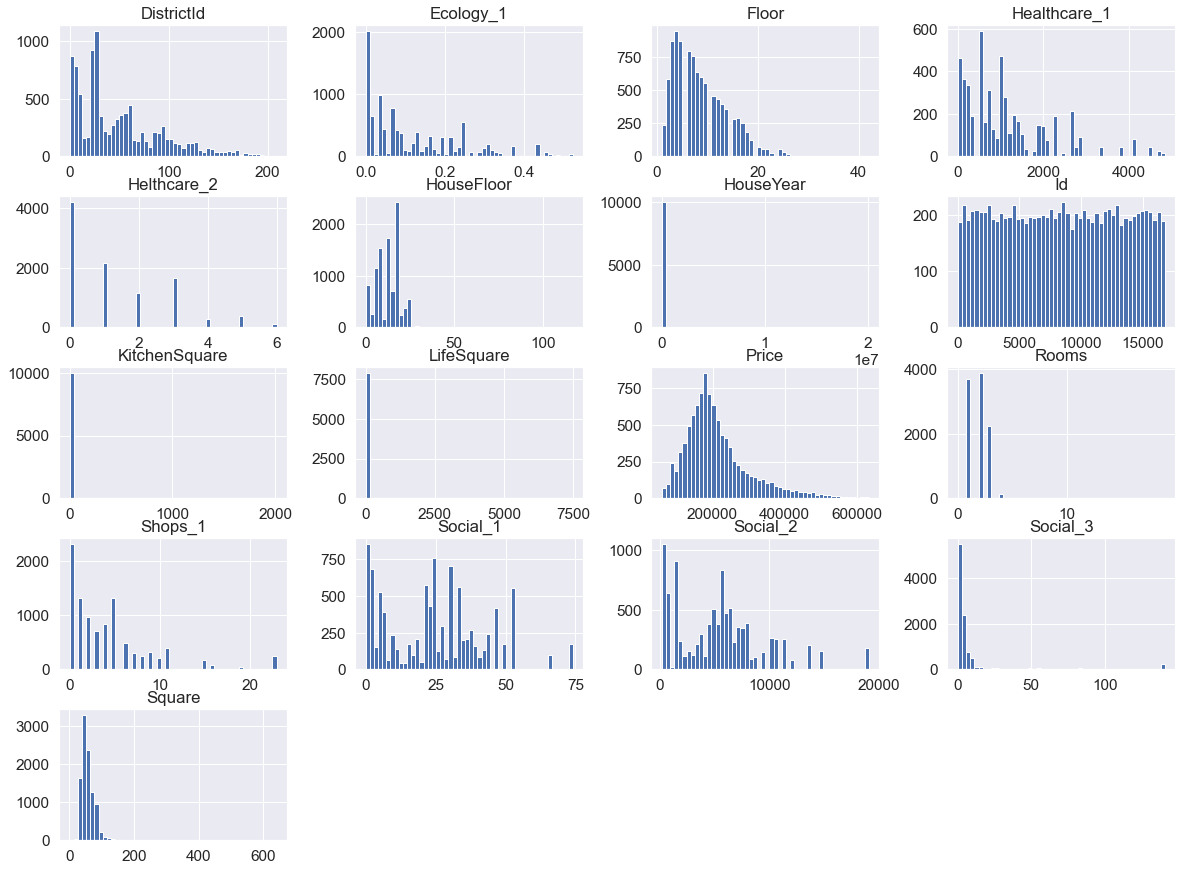

In [45]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

# EDA

## Пропущенные данные

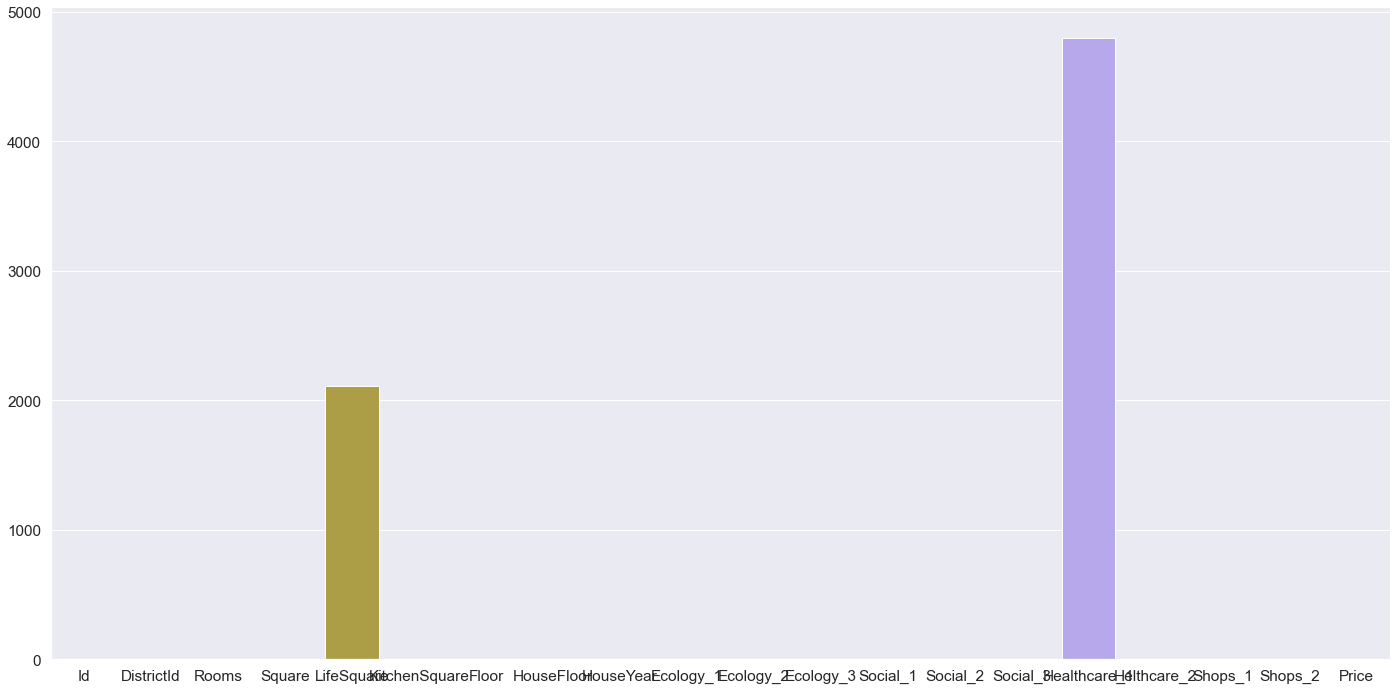

In [46]:
plt.figure(figsize=(24,12))
sns.barplot(df_train.columns, df_train.isnull().sum())

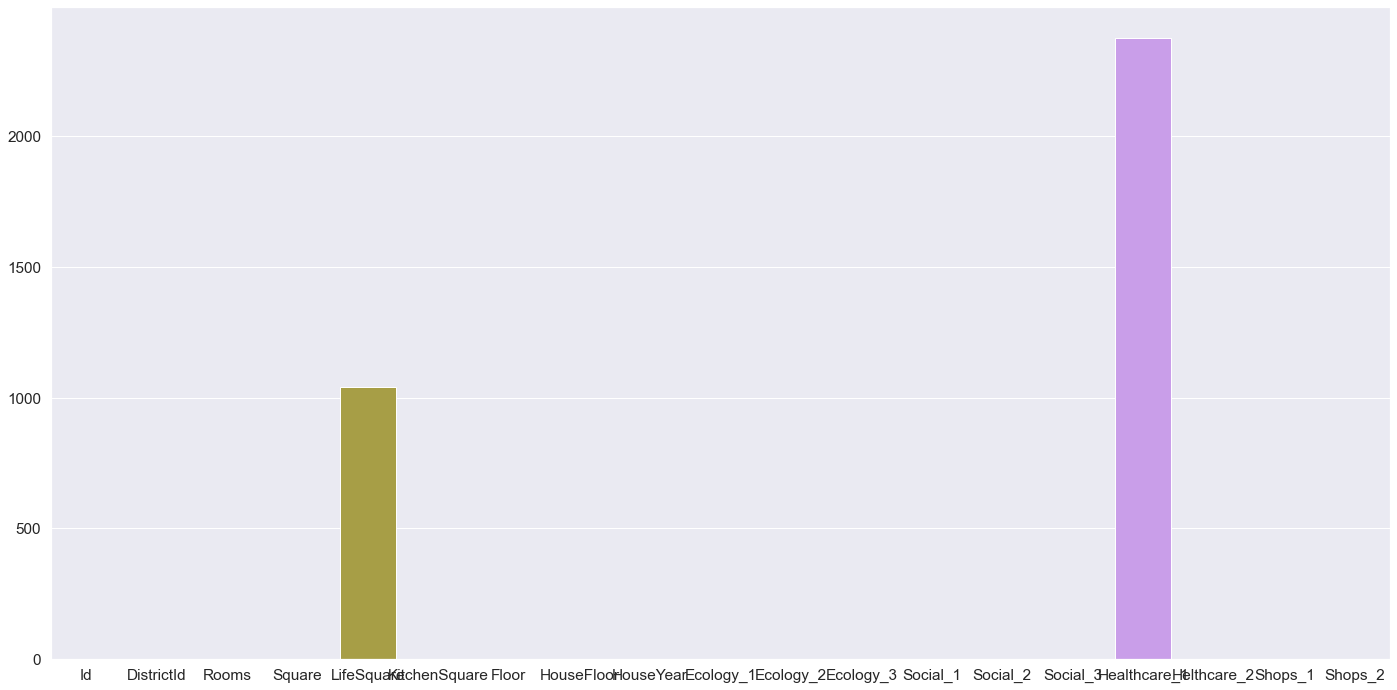

In [47]:
plt.figure(figsize=(24,12))
sns.barplot(df_test.columns, df_test.isnull().sum())

In [48]:
# LifeSquare заполняем, Healthcare_1 удаляем

## Выбросы

In [49]:
df_train.dtypes

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

Rooms

In [50]:
df_train['Rooms'].value_counts().sort_index(ascending=True)
# > 6 комнат, 0 комнат 

0.0        8
1.0     3705
2.0     3880
3.0     2235
4.0      150
5.0       18
6.0        1
10.0       2
19.0       1
Name: Rooms, dtype: int64

Square

In [51]:
df_train['Square'].value_counts().sort_index(ascending=True)

1.136859      1
1.988943      1
2.377248      1
2.596351      1
2.954309      1
             ..
212.932358    1
275.645294    1
409.425171    1
604.705994    1
641.065186    1
Name: Square, Length: 9995, dtype: int64

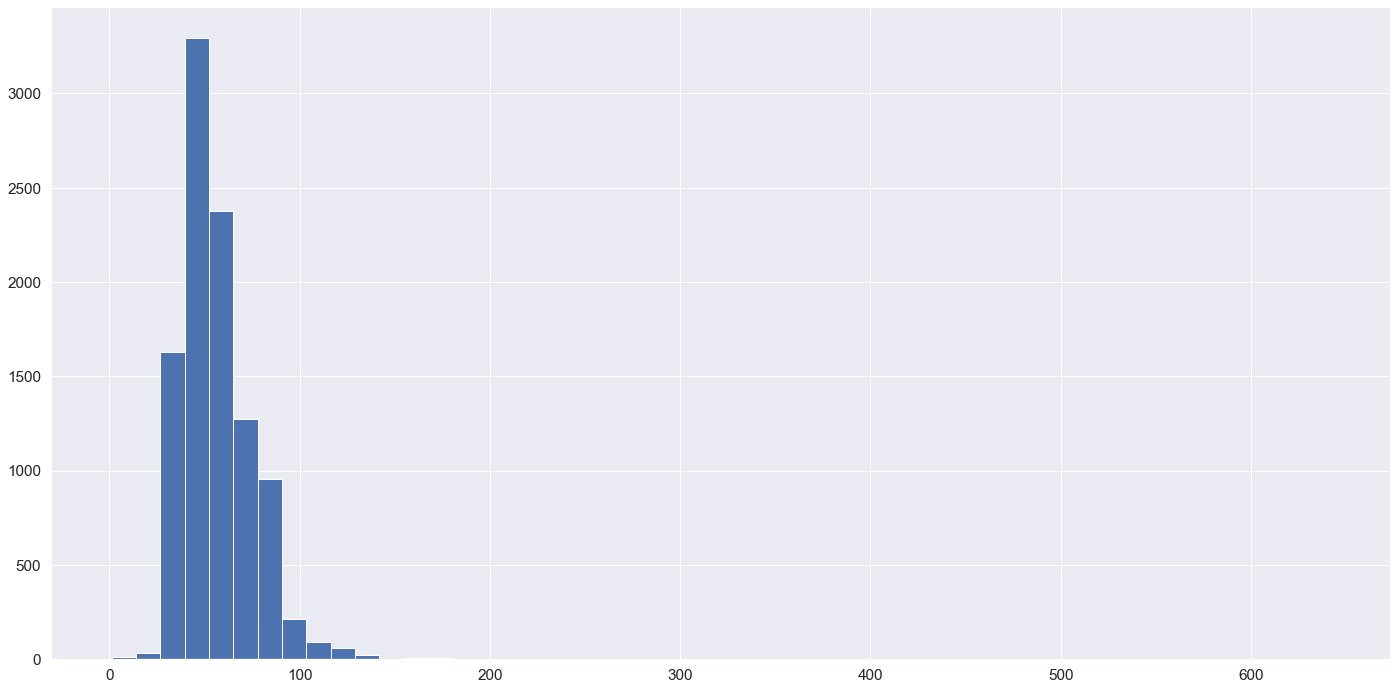

In [52]:
plt.figure(figsize=(24,12))
df_train['Square'].hist(bins=50)

In [53]:
df_train['Square'].loc[df_train['Square'] < 20] #drop

212      5.497061
1316     4.633498
1608     2.596351
1891    17.498543
3166    17.046188
3280     4.380726
3413     5.129221
3794    18.509176
4739    13.784864
4853     2.377248
4900     4.390331
5617    16.547241
6392     1.136859
6945    17.414181
7767    16.117155
7897    18.983963
8030     4.823679
8283     1.988943
9294     2.954309
9516    19.927423
9613     4.502784
Name: Square, dtype: float32

In [54]:
len(df_train['Square'].loc[df_train['Square'] > 105]) #drop

182

KitchenSquare

In [55]:
df_train['KitchenSquare'].value_counts().sort_index()
# > 5, >100

0.0        697
1.0       2460
2.0          4
3.0         22
4.0         39
5.0       1169
6.0       1038
7.0        609
8.0       1306
9.0        843
10.0      1075
11.0       233
12.0       249
13.0        67
14.0        51
15.0        31
16.0        16
17.0        12
18.0         6
19.0        11
20.0        14
21.0         1
22.0         3
23.0         1
25.0         2
26.0         1
27.0         1
29.0         1
30.0         2
31.0         1
32.0         2
35.0         1
36.0         1
37.0         2
39.0         1
40.0         1
41.0         2
42.0         1
43.0         2
48.0         1
51.0         2
53.0         1
54.0         1
58.0         2
60.0         1
62.0         1
63.0         1
66.0         1
72.0         1
73.0         1
75.0         1
78.0         1
84.0         1
96.0         1
112.0        2
123.0        1
1970.0       1
2014.0       1
Name: KitchenSquare, dtype: int64

In [56]:
df_train.loc[df_train['KitchenSquare'] > df_train['Square']] #Squre - LifeSquare

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484375
5149,13703,42,1.0,38.071693,19.723547,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.031250
7088,6569,27,1.0,38.220257,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960938
8584,14679,81,1.0,32.276665,19.278395,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.554688


LifeSquare

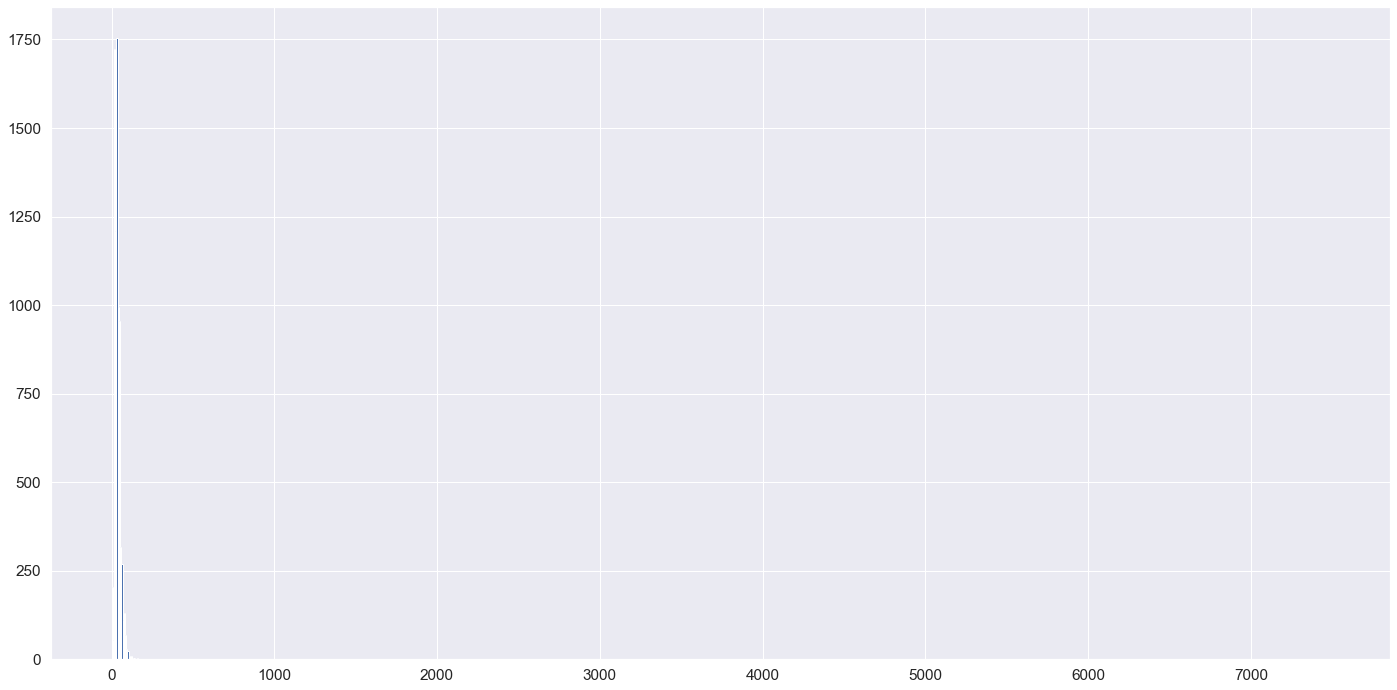

In [57]:
plt.figure(figsize=(24,12))
df_train['LifeSquare'].hist(bins=1000)

In [58]:
df_train.loc[df_train['LifeSquare'] > df_train['Square']] #Squre - KitchenSqure

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530045,43.967758,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.195312
44,10521,38,3.0,104.211395,106.340401,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.062500
52,2301,1,2.0,61.400055,65.224602,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.453125
123,8753,25,3.0,85.952309,89.803749,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.593750
153,9870,62,1.0,51.831474,53.491302,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.015896,59.439083,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.140625
9889,12918,23,2.0,51.440464,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.015625
9895,2737,27,3.0,123.430069,125.806984,123.0,5,10.0,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.843750
9902,14001,73,1.0,44.098766,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.406250


LifeSquare

In [59]:
df_train.loc[(df_train['Square'] > 20) & (df_train['LifeSquare'] < 15)], #Squre - KitchenSqure

(         Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
 26     4378          27    3.0  106.958870    0.641822            0.0     17   
 95     4280          34    2.0   61.334969    4.091945            1.0     26   
 134   12613           6    2.0   65.496674    5.589324            1.0      5   
 158   16779          27    3.0   51.991066    4.896202            1.0     22   
 160    3522           6    1.0   66.419838    3.987101            1.0      2   
 ...     ...         ...    ...         ...         ...            ...    ...   
 9756  13583          27    2.0   58.943039    3.319486            1.0     11   
 9813   2040          62    1.0  122.438148    5.751401            1.0      2   
 9828  13630          24    3.0  127.141144    4.811405            1.0      3   
 9888   6053           6    1.0   41.314774    5.005477            1.0      9   
 9954    583          27    3.0   84.250710    4.187885            1.0     15   
 
       HouseFloor  HouseYe

HouseFloor

In [60]:
df_train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.],
      dtype=float32)

In [61]:
df_train.loc[df_train['HouseFloor'] > 48]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944588,48.709602,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.12500
8599,9300,74,2.0,71.747871,74.579811,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.90625
8854,78,30,2.0,65.773750,66.811790,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.37500


In [62]:
df_train['HouseFloor'][df_train['HouseYear'] == 1977].value_counts().sort_index() # = 40

0.0       253
1.0       327
2.0        17
3.0        62
4.0        57
5.0        23
6.0        12
7.0         7
8.0         4
9.0       115
10.0       19
11.0        9
12.0      142
13.0        4
14.0       29
15.0       31
16.0       38
17.0     1034
18.0       27
19.0       44
20.0       61
21.0        6
22.0       89
23.0        3
24.0       57
25.0      175
30.0        1
40.0        3
99.0        2
117.0       1
Name: HouseFloor, dtype: int64

Floor

In [63]:
df_train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int8)

In [64]:
df_train.loc[df_train['Floor'] > df_train['HouseFloor']] # = HouseFloor

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312927,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156250
14,10953,27,1.0,53.769096,52.408028,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.562500
16,2119,27,2.0,49.360649,31.993963,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.382812
21,11935,27,2.0,64.711838,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.023438
23,6641,54,3.0,118.907608,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074974,47.633427,6.0,11,9.0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.875000
9985,16159,27,1.0,38.968338,NaN,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.570312
9989,4145,96,3.0,90.055229,47.860229,11.0,26,24.0,2005,0.041116,B,B,53,14892,4,NaN,1,4,B,441108.906250
9991,11553,3,3.0,101.622795,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.500000


HouseYear

In [65]:
df_train['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [66]:
df_train.loc[df_train['HouseYear'] > 2020] # = 2020

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265072,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.531250
4189,11607,147,2.0,44.791836,28.360394,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.609375


DistrictID

In [67]:
dict(df_train['DistrictId'].value_counts())

{27: 851,
 1: 652,
 23: 565,
 6: 511,
 9: 294,
 62: 247,
 30: 228,
 58: 179,
 53: 174,
 21: 165,
 52: 143,
 8: 142,
 11: 129,
 46: 119,
 61: 118,
 45: 116,
 74: 114,
 34: 111,
 57: 107,
 44: 104,
 99: 97,
 101: 97,
 47: 97,
 13: 97,
 7: 92,
 48: 90,
 29: 89,
 94: 89,
 41: 87,
 3: 82,
 84: 80,
 28: 79,
 2: 78,
 22: 78,
 25: 77,
 85: 76,
 93: 73,
 37: 72,
 90: 72,
 96: 71,
 59: 67,
 75: 66,
 26: 65,
 12: 64,
 88: 64,
 128: 64,
 66: 62,
 67: 61,
 17: 59,
 55: 58,
 39: 57,
 10: 56,
 105: 55,
 31: 55,
 18: 51,
 111: 49,
 119: 49,
 0: 48,
 78: 46,
 91: 44,
 124: 43,
 63: 43,
 129: 43,
 42: 42,
 79: 42,
 109: 41,
 113: 41,
 77: 40,
 54: 37,
 15: 36,
 38: 36,
 24: 35,
 5: 34,
 56: 34,
 32: 34,
 103: 33,
 123: 32,
 19: 31,
 80: 31,
 33: 31,
 83: 31,
 69: 29,
 138: 29,
 130: 29,
 64: 28,
 108: 27,
 86: 27,
 70: 27,
 87: 27,
 120: 26,
 122: 25,
 100: 25,
 121: 25,
 20: 24,
 89: 24,
 107: 23,
 35: 22,
 169: 22,
 98: 21,
 167: 20,
 144: 20,
 145: 19,
 146: 18,
 81: 18,
 134: 18,
 73: 17,
 36: 17,
 

# Очистка данных

In [68]:
class DataPipeline:
    
    def __init__(self):
        self.medians=None
        
    def fit(self, df):
        self.medians = df.median()
    
    def transform(self, df):
        
        # Rooms
        
        df = df.loc[~(df['Rooms'] < 1) | ~(df['Square'] > 6)]
        
        # Squre
        
        df = df.loc[~(df['Square'] < 20) | ~(df['Square'] > 105)]
        
        # KitchenSquare
        
        df.loc[df['KitchenSquare'] < 5, 'KitchenSquare'] = 3
        df.loc[(df['KitchenSquare'] > 1000) | (df['KitchenSquare'] > df['Square']), 'KitchenSquare'] = df.loc[(df['KitchenSquare'] > 1000) | (df['KitchenSquare'] > df['Square']), 'Square'] - df.loc[(df['KitchenSquare'] > 1000) | (df['KitchenSquare'] > df['Square']), 'LifeSquare'] 
                             
        #LifeSquare
                     
        condition = df['LifeSquare'] > df['Square']
        df.loc[condition, 'LifeSquare'] = \
        df.loc[condition, 'Square'] - df.loc[condition, 'KitchenSquare']
                    
        # HouseFloor, Floor
        df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor']
                    
        # HouseYear
        df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020
                     
        # LifeSquare    
        condition = (df['LifeSquare'].isna()) &\
                      (~df['Square'].isna()) & \
                      (~df['KitchenSquare'].isna())
        
        df.loc[condition, 'LifeSquare'] = df.loc[condition, 'Square'] - df.loc[condition, 'KitchenSquare']
                     
        # Healthcare_1
        if 'Healthcare_1' in df.columns:
            df.drop('Healthcare_1', axis=1, inplace=True)
        
        # DistrictId
        df['DistrictId'] = df['DistrictId'].astype(str)
                     
        return df

In [69]:
imputer = DataPipeline()

imputer.fit(df_train) # расчет медиан

df_train = imputer.transform(df_train)
df_test = imputer.transform(df_test)

In [70]:
df_train.dtypes

Id                  int16
DistrictId         object
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor             float32
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

# Feature Engineering

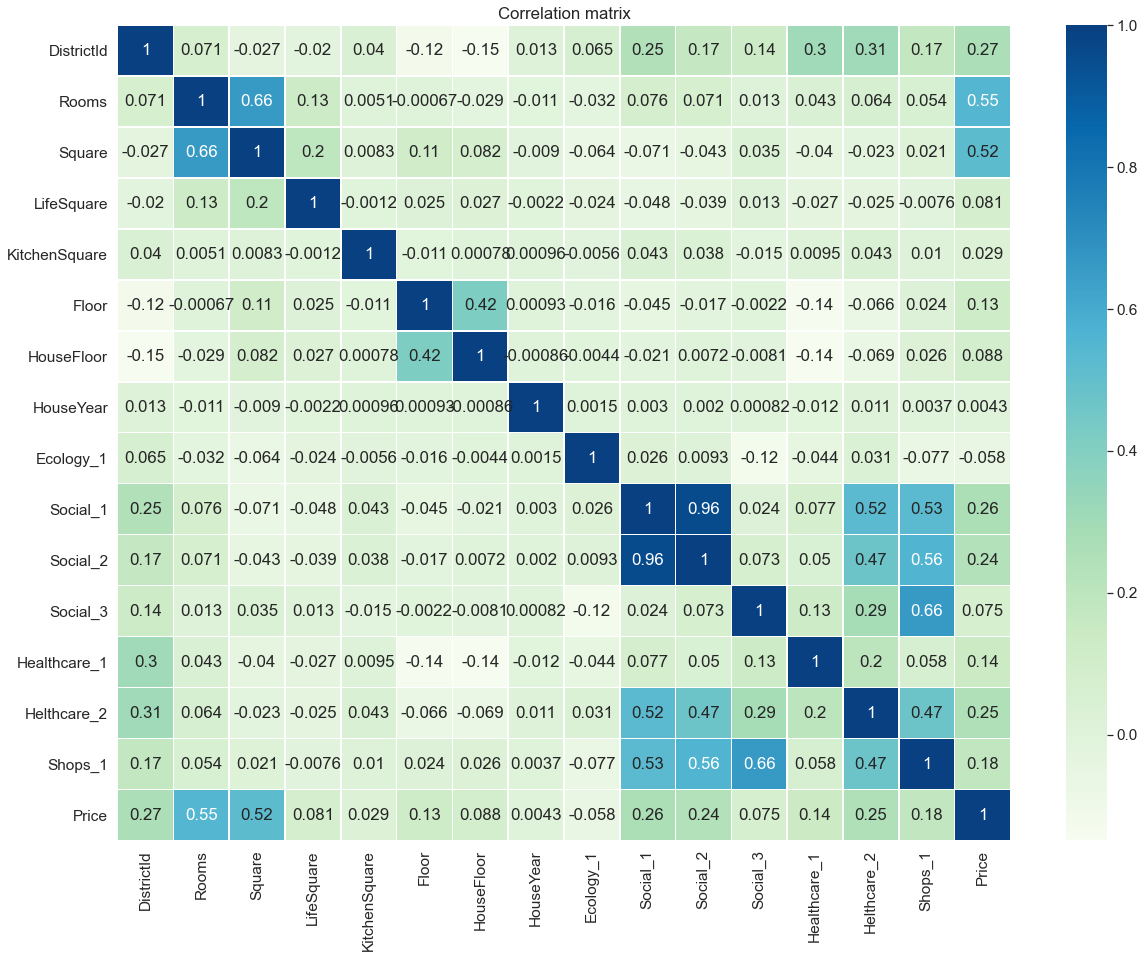

In [74]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()